# WorldClass Machine Learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
from sklearn.metrics import roc_auc_score, log_loss

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [342]:
data = pd.read_pickle('/home/dmitry/Desktop/WorldClass/final_data.pkl')
labels = pd.read_csv('/home/dmitry/Desktop/WorldClass/LABELS.csv', header=None)

In [391]:
client_code = data.КодКлиента[data.Test==True]
client_code = pd.DataFrame(client_code.reset_index())
client_code.drop(['index'], axis=1, inplace=True)
client_code = pd.to_numeric(client_code.КодКлиента)

In [394]:
clients = []
for i in client_code:
    try:
        clients.append(int(i))
    except:
        clients.append(None)

In [6]:
data.drop(['КодКлиента', "КодКонтракта"], axis=1, inplace=True)

In [7]:
labels = labels[1]

In [8]:
to_dummies = ['Exp_beg_month',
             'Exp_at_purchase',
             'Pereoforml',
             'age_group', 
             'club_segment',
             'bought_freeze',
             'contr_type',
             'nom_lev',
             'contract_month_per',
             'purchase_month_group',
             'Season']

## Disclaimer
Normalized data showed the best performance on random forest, non normalized - on XGB and NN, so, let's use 2 different datasets

In [9]:
to_normal = []
for column in data.columns:
    if column not in to_dummies and column!="Test":
        to_normal.append(column)

In [10]:
from sklearn import preprocessing
# normalize the data attributes
data_norm = data.copy()
data_norm[to_normal] = pd.DataFrame(preprocessing.normalize(data[to_normal]))

In [11]:
data_norm.head()

,Pereoforml,AmPaySod,freeze_day_left,Test,Exp_beg_month,Exp_at_purchase,Cont_length,beg_month,beg_day,Season,...,Spring,Com_last_month,sum_commun,successful_commun,meeting,telephone_commun,other_commun,success_com_freq,contract_month_per,purchase_month_group
0,0,0.0,0.000000,False,2,2,0.689884,0.019261,0.036770,3.0,...,0.0,0.001751,0.007004,0.005253,0.000000,0.001751,0.000000,0.001313,end,2
1,0,0.0,0.000000,False,2,0,0.266608,0.008838,0.038297,2.0,...,0.0,0.001473,0.013257,0.007365,0.001473,0.001473,0.000000,0.000818,end,1
2,0,0.0,0.000000,False,2,2,0.067395,0.001590,0.004610,3.0,...,0.0,0.000159,0.002702,0.001590,0.000159,0.000159,0.000000,0.000094,end,2
3,0,0.0,0.037871,False,2,2,0.894706,0.028403,0.004734,0.0,...,0.0,0.002367,0.007101,0.004734,0.000000,0.002367,0.002367,0.001578,begin,2
4,0,0.0,0.006074,False,2,2,0.592202,0.016703,0.024295,3.0,...,0.0,0.001518,0.006074,0.003037,0.001518,0.001518,0.000000,0.000759,mid,2


In [12]:
data.head()

,Pereoforml,AmPaySod,freeze_day_left,Test,Exp_beg_month,Exp_at_purchase,Cont_length,beg_month,beg_day,Season,...,Spring,Com_last_month,sum_commun,successful_commun,meeting,telephone_commun,other_commun,success_com_freq,contract_month_per,purchase_month_group
0,0,0,0,False,2,2,394.0,11,21,3.0,...,0.0,1.0,4.0,3.0,0.0,1.0,0.0,0.750000,end,2
1,0,0,0,False,2,0,181.0,6,26,2.0,...,0.0,1.0,9.0,5.0,1.0,1.0,0.0,0.555556,end,1
2,0,0,0,False,2,2,424.0,10,29,3.0,...,0.0,1.0,17.0,10.0,1.0,1.0,0.0,0.588235,end,2
3,0,0,16,False,2,2,378.0,12,2,0.0,...,0.0,1.0,3.0,2.0,0.0,1.0,1.0,0.666667,begin,2
4,0,0,4,False,2,2,390.0,11,16,3.0,...,0.0,1.0,4.0,2.0,1.0,1.0,0.0,0.500000,mid,2


In [13]:
data_norm = pd.get_dummies(data_norm, columns=to_dummies)

In [14]:
data = pd.get_dummies(data, columns=to_dummies)

In [15]:
data_norm.head()

,AmPaySod,freeze_day_left,Test,Cont_length,beg_month,beg_day,bonus_left,visit_length,sport_sevice,health_beauty,...,contract_month_per_begin,contract_month_per_end,contract_month_per_mid,purchase_month_group_0,purchase_month_group_1,purchase_month_group_2,Season_0.0,Season_1.0,Season_2.0,Season_3.0
0,0.0,0.000000,False,0.689884,0.019261,0.036770,0.682880,0.233313,0.003502,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,False,0.266608,0.008838,0.038297,0.950275,0.144575,0.025041,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,False,0.067395,0.001590,0.004610,0.997569,0.015382,0.001272,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.037871,False,0.894706,0.028403,0.004734,0.001704,0.338067,0.125448,0.018936,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.006074,False,0.592202,0.016703,0.024295,0.789603,0.140257,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
train_tree = data_norm[data_norm.Test==False]
test_tree = data_norm[data_norm.Test==True]

In [17]:
train = data[data.Test == False]
test = data[data.Test == True]

In [18]:
len(train)

8634

## Train-Test Split

In [19]:
X = train
y = labels

In [20]:
X_tree = train_tree

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.15, random_state=42)

In [23]:
Xtr_tree, Xval_tree, ytr_tree, yval_tree = train_test_split(X_tree, y, test_size=0.15, random_state=42)

In [24]:
Xtr.shape, Xval.shape

((7338, 72), (1296, 72))

In [25]:
Xtr_tree.shape, Xval_tree.shape

((7338, 72), (1296, 72))

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=3)
rf.fit(Xtr_tree, ytr_tree)
print(log_loss(yval_tree, rf.predict_proba(Xval_tree)))

0.189873365652


In [28]:
print(roc_auc_score(yval_tree, rf.predict(Xval_tree)))

0.951575881376


In [29]:
from sklearn.calibration import CalibratedClassifierCV

In [30]:
calib = CalibratedClassifierCV(RandomForestClassifier(n_jobs=3, n_estimators=1000), cv=10, method='isotonic')
calib.fit(Xtr_tree, ytr_tree)
print(log_loss(yval_tree, calib.predict_proba(Xval_tree)))
print(roc_auc_score(yval_tree, calib.predict(Xval_tree)))

0.183649001048
0.949940768884


# XGBoost

In [31]:
import sys
sys.path.append('/home/dmitry/xgboost/python-package/')

In [32]:
import xgboost as xgb

In [33]:
dtrain = xgb.DMatrix(X, label=y)

In [34]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.01,
    'subsample': 0.5,
    'min_child_weight': 1,
    'colsample_bytree':0.6
}
trees = 1500

In [35]:
cv = xgb.cv(params, dtrain, metrics=('auc'), verbose_eval=False, nfold=7, show_stdv=False, num_boost_round=trees)

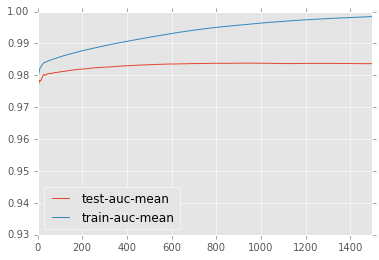

In [36]:
%matplotlib inline
cv.plot(y=['test-auc-mean', 'train-auc-mean'])

In [37]:
cv.loc[cv['test-auc-mean'].argmax()]

test-auc-mean     0.983871
test-auc-std      0.001570
train-auc-mean    0.996427
train-auc-std     0.000096
Name: 1002, dtype: float64

In [38]:
cv['test-auc-mean'].argmax()

1002

In [39]:
bst = xgb.train(params, dtrain, num_boost_round=cv['test-auc-mean'].argmax())

In [40]:
imps = pd.Series(bst.get_fscore()).sort_values()

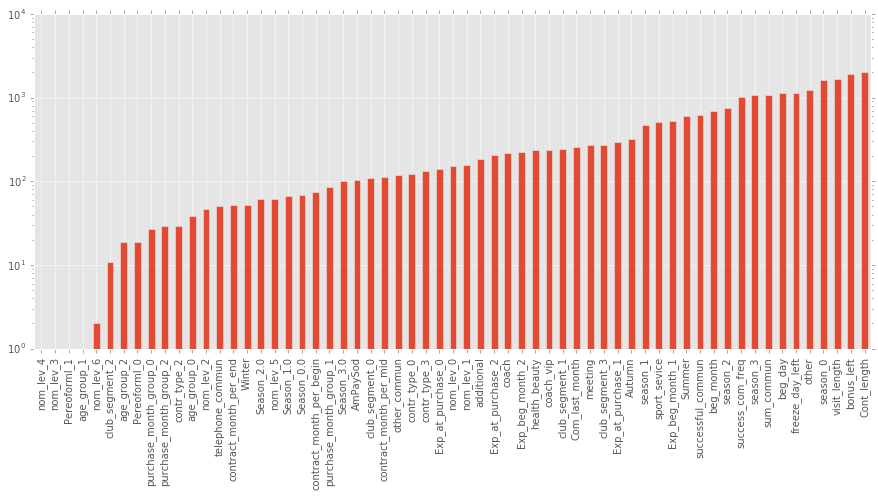

In [41]:
%matplotlib inline
imps.plot(kind='bar', figsize=(15,6),logy=True)

In [42]:
good_columns = list(pd.DataFrame(imps.reset_index())['index'])






Let's try to drop the columns which are not in the good_columns set

In [43]:
to_drop = []
all_columns = list(train)
for name in all_columns:
    if name not in good_columns:
        to_drop.append(name)

In [44]:
to_drop

['Test',
 'Spring',
 'Exp_beg_month_0',
 'club_segment_4',
 'bought_freeze_0',
 'bought_freeze_1',
 'bought_freeze_2',
 'bought_freeze_3',
 'bought_freeze_4',
 'contr_type_1',
 'contr_type_4']

In [45]:
data_new = data_norm.drop(to_drop[1:], axis = 1)

In [46]:
data_xgb = data.drop(to_drop[1:], axis = 1)

In [47]:
train_new = data_new[data_new.Test==False]
test_new = data_new[data_new.Test==True]

In [324]:
train_xgb = data_xgb[data_xgb.Test==False]
test_xgb = data_xgb[data_xgb.Test==True]

In [49]:
X_xgb = train_xgb

In [50]:
X_new = train_new

In [51]:
Xtr_new, Xval_new, ytr, yval = train_test_split(X_new, y, test_size=0.15, random_state=42)

In [52]:
calib = CalibratedClassifierCV(RandomForestClassifier(n_jobs=3, n_estimators=1000), cv=10, method='isotonic')
calib.fit(Xtr_new, ytr)
print(log_loss(yval, calib.predict_proba(Xval_new)))
print(roc_auc_score(yval, calib.predict(Xval_new)))

0.180372672321
0.952370793935


In [53]:
dtrain = xgb.DMatrix(X_xgb, label=y)

In [54]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.01,
    'subsample': 0.5,
    'min_child_weight': 1,
    'colsample_bytree':0.6
}
trees = 1300

In [55]:
cv = xgb.cv(params, dtrain, metrics=('auc'), verbose_eval=False, nfold=7, show_stdv=False, num_boost_round=trees)

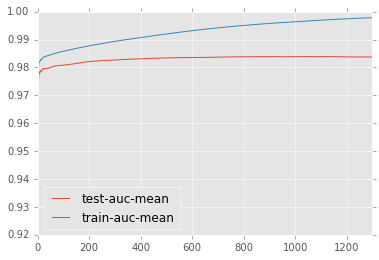

In [56]:
%matplotlib inline
cv.plot(y=['test-auc-mean', 'train-auc-mean'])

In [57]:
cv['test-auc-mean'].argmax()

1114

In [58]:
cv.loc[cv['test-auc-mean'].argmax()]

test-auc-mean     0.983884
test-auc-std      0.001489
train-auc-mean    0.997016
train-auc-std     0.000064
Name: 1114, dtype: float64

Thus, after deleting 12 columns in total, the overall test-auc-meam increased by 0.003

In [59]:
bst = xgb.train(params, dtrain, num_boost_round=cv['test-auc-mean'].argmax())

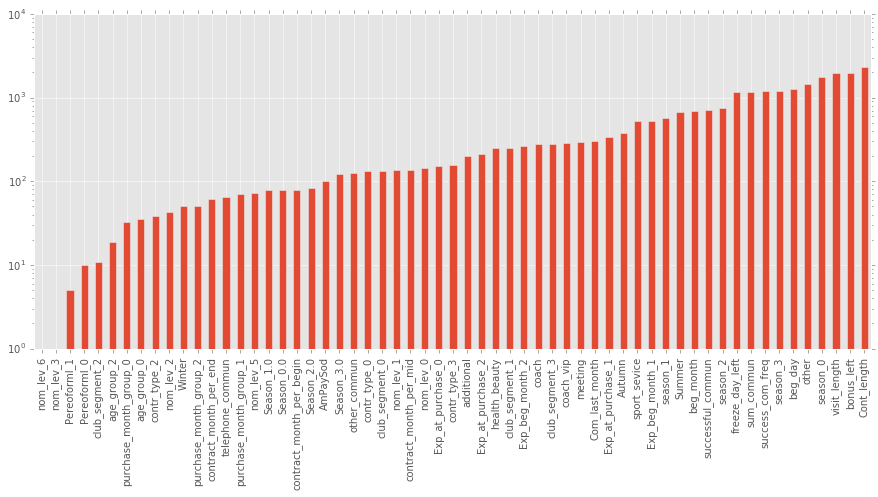

In [60]:
imps = pd.Series(bst.get_fscore()).sort_values()
imps.plot(kind='bar', figsize=(15,6),logy=True)

In [61]:
good_columns = list(pd.DataFrame(imps.reset_index())['index'])

In [62]:
to_drop = []
all_columns = list(train_new)
for name in all_columns:
    if name not in good_columns:
        to_drop.append(name)
print(to_drop)

['Test', 'age_group_1', 'nom_lev_4']


In [270]:
data_xgb = data.drop(to_drop[1:], axis = 1)
train_xgb = data_xgb[data_xgb.Test==False]
test_xgb = data_xgb[data_xgb==True]
X_xgb = train_xgb
Xtr_xgb, Xval_xgb, ytr, yval = train_test_split(X_xgb, y, test_size=0.15, random_state=42)

# Neural Networks

In [64]:
sys.path.append('/usr/local/lib/python3.5/dist-packages')

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [66]:
nn = Sequential()
nn.add(Dense(128, input_dim=72, init='uniform'))
nn.add(Activation('sigmoid'))
nn.add(Dense(2, init='uniform'))
nn.add(Activation('softmax'))

opt = Adam(lr=1e-3)
nn.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [68]:
Xtr.shape, ytr.shape, Xval.shape, yval.shape

((7338, 72), (7338,), (1296, 72), (1296,))

In [69]:
hist = nn.fit(ss.fit_transform(Xtr), ytr, nb_epoch=80 ,validation_data=(ss.transform(Xval), yval))

Train on 7338 samples, validate on 1296 samples
Epoch 1/80
7338/7338 [==============================] - 1s - loss: 0.3842 - val_loss: 0.2237
Epoch 2/80
7338/7338 [==============================] - 1s - loss: 0.1965 - val_loss: 0.1931
Epoch 3/80
7338/7338 [==============================] - 1s - loss: 0.1832 - val_loss: 0.1926
Epoch 4/80
7338/7338 [==============================] - 1s - loss: 0.1807 - val_loss: 0.1925
Epoch 5/80
7338/7338 [==============================] - 1s - loss: 0.1804 - val_loss: 0.1884
Epoch 6/80
7338/7338 [==============================] - 1s - loss: 0.1784 - val_loss: 0.1901
Epoch 7/80
7338/7338 [==============================] - 1s - loss: 0.1787 - val_loss: 0.1918
Epoch 8/80
7338/7338 [==============================] - 1s - loss: 0.1781 - val_loss: 0.1870
Epoch 9/80
7338/7338 [==============================] - 1s - loss: 0.1769 - val_loss: 0.1878
Epoch 10/80
7338/7338 [==============================] - 1s - loss: 0.1763 - val_loss: 0.1849
Epoch 11/80
7338/7338

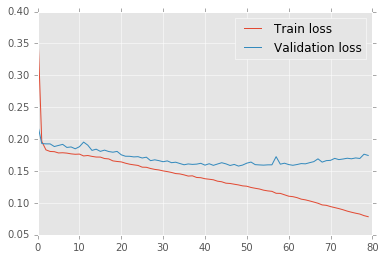

In [70]:
start = 0
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

In [71]:
min(hist.history['val_loss'])

0.15777405843506626

In [72]:
np.array(hist.history['val_loss']).argmin()

48

# SVM (Support Vector Machines) 

In [73]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data

model_SVM = SVC(probability=True)
model_SVM.fit(Xtr_new, ytr)
#print(model_SVM)
# make predictions
expected = yval
predicted = model_SVM.predict(Xval_new)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       667
          1       0.97      0.86      0.91       629

avg / total       0.92      0.92      0.92      1296

[[649  18]
 [ 91 538]]


In [74]:
model_SVM.predict_proba(Xval_new)

array([[ 0.03926838,  0.96073162],
       [ 0.8936348 ,  0.1063652 ],
       [ 0.89464411,  0.10535589],
       ..., 
       [ 0.03723459,  0.96276541],
       [ 0.8953612 ,  0.1046388 ],
       [ 0.03730476,  0.96269524]])

# kNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model_kNN = KNeighborsClassifier()
model_kNN.fit(Xtr_new, ytr)
print(model_kNN)
# make predictions
expected = yval
predicted = model_kNN.predict(Xval_new)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.87      0.95      0.91       667
          1       0.94      0.85      0.89       629

avg / total       0.91      0.90      0.90      1296

[[633  34]
 [ 93 536]]


# Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB
model_B = GaussianNB()
model_B.fit(Xtr_new, ytr)
print(model_B)
# make predictions
expected = yval
predicted = model_B.predict(Xval_new)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

          0       0.92      0.92      0.92       667
          1       0.92      0.91      0.91       629

avg / total       0.92      0.92      0.92      1296

[[615  52]
 [ 57 572]]


# Logregression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtr_new, ytr)
print('Train logloss', log_loss(ytr, lr.predict_proba(Xtr_new)))
print('Train roc_auc', roc_auc_score(ytr, lr.predict(Xtr_new)))
print('Validation logloss', log_loss(yval, lr.predict_proba(Xval_new)))
print('Validation roc_auc', roc_auc_score(yval, lr.predict(Xval_new)))

Train logloss 0.217003252716
Train roc_auc 0.92344169757
Validation logloss 0.22452928465
Validation roc_auc 0.920619578923


In [78]:
from sklearn.grid_search import GridSearchCV
Cs = 10**np.linspace(-1, 7, num=15)
Cs

array([  1.00000000e-01,   3.72759372e-01,   1.38949549e+00,
         5.17947468e+00,   1.93069773e+01,   7.19685673e+01,
         2.68269580e+02,   1.00000000e+03,   3.72759372e+03,
         1.38949549e+04,   5.17947468e+04,   1.93069773e+05,
         7.19685673e+05,   2.68269580e+06,   1.00000000e+07])

In [79]:
grid = {'C': Cs}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='log_loss', cv=6)
%time gridsearch.fit(X_new, y)

CPU times: user 3min 8s, sys: 1.2 s, total: 3min 9s
Wall time: 2min 42s


GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-01,   3.72759e-01,   1.38950e+00,   5.17947e+00,
         1.93070e+01,   7.19686e+01,   2.68270e+02,   1.00000e+03,
         3.72759e+03,   1.38950e+04,   5.17947e+04,   1.93070e+05,
         7.19686e+05,   2.68270e+06,   1.00000e+07])},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

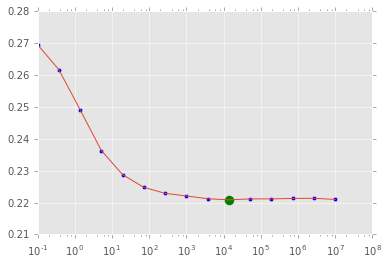

In [80]:
scores = [-x.mean_validation_score for x in  gridsearch.grid_scores_]
plt.plot(Cs, scores)
plt.scatter(Cs, scores)
plt.scatter(Cs[np.argmin(scores)], scores[np.argmin(scores)], c='g', s=100)
plt.xscale('log')

In [81]:
C = Cs[np.argmin(scores)]
C

13894.95494373136

In [82]:
lr = LogisticRegression(C=C)
lr.fit(Xtr_new, ytr)
print('Train logloss', log_loss(ytr, lr.predict_proba(Xtr_new)))
print('Train roc_auc', roc_auc_score(ytr, lr.predict(Xtr_new)))
print('Validation logloss', log_loss(yval, lr.predict_proba(Xval_new)))
print('Validation roc_auc', roc_auc_score(yval, lr.predict(Xval_new)))

Train logloss 0.187845978492
Train roc_auc 0.936800398032
Validation logloss 0.202908070614
Validation roc_auc 0.940582967658


# Some more random forests but on partial data

In [83]:
import random

In [84]:
colums_dict = {}
bad_models = {}
n_trees = 100

In [85]:
for i in range(n_trees):
    colums_dict[i] = random.sample(set(Xtr_new.columns), 5)

In [86]:
bad_calib = CalibratedClassifierCV(RandomForestClassifier(n_jobs=-1, n_estimators=60), cv=10, method='isotonic')

In [87]:
for i in range(n_trees):
    bad_models[i] = bad_calib.fit(Xtr_new[colums_dict[i]], ytr)
    print("Current model:", i, "Score is:", roc_auc_score(yval, bad_calib.predict(Xval_new[colums_dict[i]])))

Current model: 0 Score is: 0.629582664947
Current model: 1 Score is: 0.884551762275
Current model: 2 Score is: 0.67149612793
Current model: 3 Score is: 0.687661336264
Current model: 4 Score is: 0.49336897529
Current model: 5 Score is: 0.586777755796
Current model: 6 Score is: 0.65070326522
Current model: 7 Score is: 0.625014599219
Current model: 8 Score is: 0.625578307825
Current model: 9 Score is: 0.807777748646
Current model: 10 Score is: 0.574622863449
Current model: 11 Score is: 0.914169703701
Current model: 12 Score is: 0.497413852692
Current model: 13 Score is: 0.803139368313
Current model: 14 Score is: 0.693431900902
Current model: 15 Score is: 0.499325456509
Current model: 16 Score is: 0.696364854139
Current model: 17 Score is: 0.909012902134
Current model: 18 Score is: 0.77399932784
Current model: 19 Score is: 0.526844685765
Current model: 20 Score is: 0.54201357191
Current model: 21 Score is: 0.545462562836
Current model: 22 Score is: 0.756939098019
Current model: 23 Score is

# Meta classifier

### XGB

In [243]:
trees = cv['test-auc-mean'].argmax()
dXtr = xgb.DMatrix(Xtr_xgb, label=ytr)
dXval = xgb.DMatrix(Xval_xgb, label=yval)
xgb_Xtr_only = xgb.train(params, dXtr, num_boost_round=trees)
clf1_p = xgb_Xtr_only.predict(dXval)
clf1_p[1:5]

array([ 0.4693374 ,  0.04026079,  0.02761482,  0.38594019], dtype=float32)

In [244]:
roc_auc_score(yval, clf1_p)

0.98258104651966538

---
All prediction from other models give a two-column arrays, first column - probabilities of being "0", second - "1". Time to make one column one and for all!

In [90]:
def two_to_one(vector):
    val = []
    for i in range(len(vector)):
        val.append(vector[i][1])
    return val

### Calib Forest

In [91]:
clf2_p = calib.predict_proba(Xval_new)
clf2_p = two_to_one(clf2_p)

### NN

In [288]:
clf3_p = nn.predict_proba(ss.transform(Xval))
clf3_p = two_to_one(clf3_p)

1296/1296 [==============================] - 0s     


### SVM

In [93]:
clf4_p = model_SVM.predict_proba(Xval_new)
clf4_p = two_to_one(clf4_p)

### k-NN

In [94]:
clf5_p = model_kNN.predict_proba(Xval_new)
clf5_p = two_to_one(clf5_p)

### Naive bayes

In [95]:
clf6_p = model_B.predict_proba(Xval_new)
clf6_p = two_to_one(clf6_p)

### Logreg

In [96]:
clf7_p = lr.predict_proba(Xval_new)
clf7_p = two_to_one(clf7_p)

### Limited forests

In [97]:
clf_dict = {}
for i in range(n_trees):
    clf_dict[i] = two_to_one(bad_models[i].predict_proba(Xval_new[colums_dict[i]]))

# Hard voting classifier of limited forests

In [98]:
bad_forest = pd.DataFrame(clf_dict)

In [99]:
def majority(row):
    yes = 0
    no = 0
    for i in row:
        if i>0.3901:
            yes+=1
        else:
            no+=1
    if yes>no:
        return 0.9999999999999999
    else:
        return 0.0000000000000001

In [100]:
bad_predictions = np.array(bad_forest.apply(lambda row: majority(row), axis=1))
print(roc_auc_score(yval, bad_predictions))

0.67675899729


In [289]:
classifiers = [clf1_p, 
               clf2_p, 
               clf3_p, 
               clf4_p, 
               clf5_p, 
               clf6_p, 
               clf7_p,
               bad_predictions]

### Now creating the predictions matrix and use it as a predictors matrix for final ensebmle classifier

In [290]:
predictions = pd.DataFrame(classifiers[0:5]).T

In [291]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(LogisticRegression(), predictions, yval, scoring='roc_auc', cv=18)
scores.mean()

0.98433823031346257

In [292]:
for classif in classifiers:
    print(log_loss(yval, classif))

0.147586551319
0.180373289294
0.174429145055
0.272634023439
1.26724742882
1.52323781873
0.202908070614
11.1666055726


In [293]:
for classif in classifiers:
    print(roc_auc_score(yval, classif))

0.98258104652
0.981450053987
0.98011526828
0.967881718918
0.940089573655
0.93473612955
0.967969910116
0.67675899729


In [294]:
print(np.corrcoef(classifiers)>0.9)

[[ True  True  True  True False  True  True False]
 [ True  True  True  True  True  True  True False]
 [ True  True  True False False False  True False]
 [ True  True False  True  True False  True False]
 [False  True False  True  True False  True False]
 [ True  True False False False  True  True False]
 [ True  True  True  True  True  True  True False]
 [False False False False False False False  True]]


In [295]:
Ps = np.array(classifiers).T
def ensemble_logloss(w):
    return log_loss(yval, (Ps*w).sum(1).T/np.sum(w))

In [296]:
ensemble_logloss(np.ones(len(classifiers)))

0.18375186643376454

In [297]:
def ensemble_roc_auc(w):
    return roc_auc_score(yval, (Ps*w).sum(1).T/np.sum(w))

In [298]:
ensemble_roc_auc(np.ones(len(classifiers)))

0.98171581935582275

In [299]:
from scipy.optimize import minimize

In [300]:
opt = minimize(ensemble_logloss, x0=np.ones(len(classifiers)))
print("Function result:", opt.fun)
print("Array:", opt.x)

Function result: 0.14140056256323644
Array: [ 6.61014099  1.47305272  0.97652865 -0.05139939  0.26658986  0.49623907
 -1.98586617  0.17256587]


In [301]:
w = opt.x/opt.x.sum()
w

array([ 0.83064391,  0.18510683,  0.1227126 , -0.00645895,  0.03350023,
        0.06235842, -0.24954803,  0.02168498])

In [302]:
ensebmle_prob_validation = np.zeros(len(clf1_p))
for i in range(len(classifiers)):
    ensebmle_prob_validation += np.array(classifiers[i]) * w[i]

In [303]:
ensebmle_prob_validation[ensebmle_prob_validation<0] = 0

In [304]:
ensebmle_prob_validation[ensebmle_prob_validation>1] = 1

In [305]:
log_loss(yval, ensebmle_prob_validation), roc_auc_score(yval, ensebmle_prob_validation)

(0.14140057333071582, 0.98633989841327352)

If optimal values are below zero - delete the classifier from ensemble

In [306]:
def optimal(values):
    optimal_classifiers = []
    for i in range(len(values)):
        if values[i] > 0:
            print("Classifier", i+1, "is good")
            optimal_classifiers.append(classifiers[i])
    return optimal_classifiers

In [307]:
def full_negative_elimination(weights):
    global classifiers, Ps
    while sum(weights<0) > 0:
        opt = minimize(ensemble_logloss, x0=np.ones(len(classifiers)))
        print("Function result:", opt.fun)
        classifiers = optimal(opt.x)
        Ps = np.array(classifiers).T
        weights = opt.x/opt.x.sum()
        print("Current weights:", weights)
        print('=======')
    return weights

In [308]:
w = full_negative_elimination(w)

Function result: 0.14140056256323644
Classifier 1 is good
Classifier 2 is good
Classifier 3 is good
Classifier 5 is good
Classifier 6 is good
Classifier 8 is good
Current weights: [ 0.83064391  0.18510683  0.1227126  -0.00645895  0.03350023  0.06235842
 -0.24954803  0.02168498]
Function result: 0.14406315287327792
Classifier 1 is good
Classifier 2 is good
Classifier 3 is good
Classifier 4 is good
Classifier 5 is good
Classifier 6 is good
Current weights: [ 0.66159719  0.11316514  0.17892591  0.00460496  0.02733967  0.01436713]


In [309]:
ensebmle_prob_validation = np.zeros(len(clf1_p))
for i in range(len(classifiers)):
    ensebmle_prob_validation += np.array(classifiers[i]) * w[i]
    
ensebmle_prob_validation[ensebmle_prob_validation<0] = 0
ensebmle_prob_validation[ensebmle_prob_validation>1] = 1

In [310]:
log_loss(yval, ensebmle_prob_validation), roc_auc_score(yval, ensebmle_prob_validation)

(0.14406314243454185, 0.98485971640570802)

In [311]:
print(round(roc_auc_score(yval, ensebmle_prob_validation), 5))

0.98486


## Models that are left in ensebmle
- 1 - XGB 
- 2 - RandomForest
- 3 - NN
- 4 - SVM
- 5 - kNN
- 6 - Naive Bayes

# Now making predictions

In [325]:
dtest = xgb.DMatrix(test_xgb)

In [326]:
p1 = xgb_Xtr_only.predict(dtest)

In [281]:
p2 = two_to_one(calib.predict_proba(test_new))

In [312]:
p3 = two_to_one(nn.predict_proba(ss.transform(test)))

8998/8998 [==============================] - 0s     


In [328]:
p4 = two_to_one(model_SVM.predict_proba(test_new))

In [332]:
p5 = two_to_one(model_kNN.predict_proba(test_new))

In [334]:
p6 = two_to_one(model_B.predict_proba(test_new))

In [336]:
test_predictions = [p1, p2, p3, p4, p5, p6]

In [337]:
ensebmle_prob_test = np.zeros(len(p1))
for i in range(len(test_predictions)):
    ensebmle_prob_test += np.array(test_predictions[i]) * w[i]
    
ensebmle_prob_test[ensebmle_prob_test<0] = 0
ensebmle_prob_test[ensebmle_prob_test>1] = 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2eabb52470>]], dtype=object)

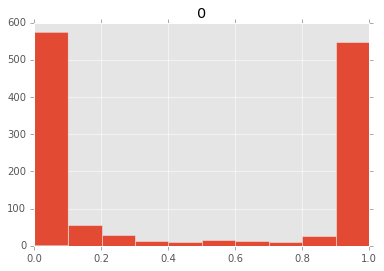

In [341]:
pd.DataFrame(ensebmle_prob_validation).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2eaba1bbe0>]], dtype=object)

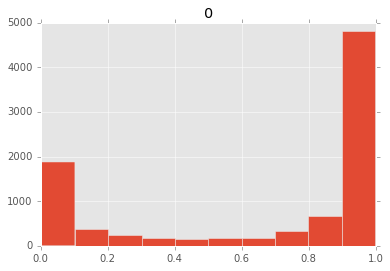

In [340]:
pd.DataFrame(ensebmle_prob_test).hist()

# Save predictions

In [402]:
sub = pd.DataFrame()
sub['КодКлиента'] = clients
sub['Продлился'] = ensebmle_prob_test

In [407]:
sub.head()

,КодКлиента,Продлился
0,129616.0,0.988075
1,657514.0,0.989483
2,658834.0,0.848037
3,658728.0,0.805136
4,654996.0,0.976665


In [411]:
sub.to_csv('/home/dmitry/Desktop/WorldClass/final_predictions.csv', index=False)